# Numpy - Plotting with Matplotlib

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

<IPython.core.display.Javascript object>

In [2]:
from addutils import css_notebook
css_notebook()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## 1 Simple 2D Plots

matplotlib is probably the single most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. We are going to explore matplotlib in interactive mode covering most common cases.

In this section, we want to draw the cosine and sine functions on the same plot. Starting from the default settings, we’ll enrich the figure step by step to make it nicer.

Documentation and reference:

* [matplotlib documentation](http://matplotlib.org/contents.html)

First step is to get the data for the sine and cosine functions:

In [4]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s = np.cos(x), np.sin(x)

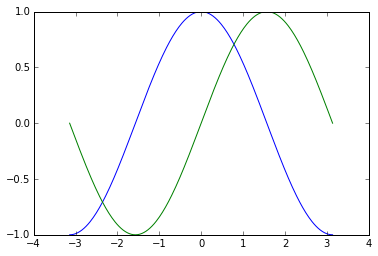

In [5]:
plt.plot(x, c)
plt.plot(x, s)
plt.show()

In the script below, we’ve instantiated all the figure settings that influence the appearance of the plot. The settings have been explicitly set to their default values: try playing with the values to explore their effect (see Line properties and Line styles below).

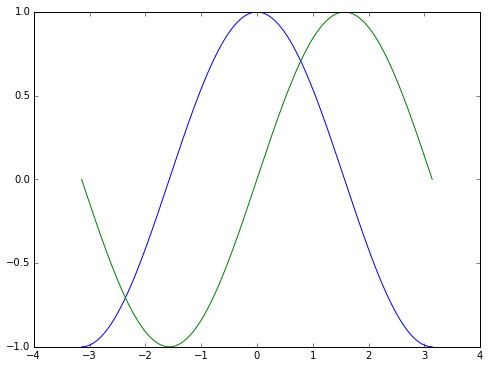

In [6]:
# Create a figure of size 8x6 points, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)
# Create a new subplot from a grid of 1x1
plt.subplot(111)
# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(x, c, color="blue", linewidth=1.0, linestyle="-")
# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(x, s, color="green", linewidth=1.0, linestyle="-")
# Set x limits
plt.xlim(-4.0, 4.0)
# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
# Set y limits
plt.ylim(-1.0, 1.0)
# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))
# Save figure using 72 dots per inch
plt.savefig('temp/test_plot_01.png', dpi=300)
plt.show()

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

**Changing colors and line widths:** we want to have the cosine in blue and the sine in red and a slighty thicker line for both of them. We’ll also slightly alter the figure size to make it more horizontal.

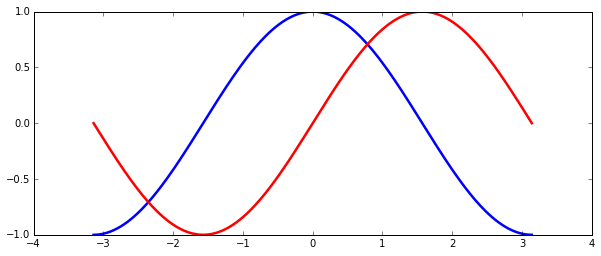

In [8]:
plt.figure(figsize=(10, 4), dpi=80)
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-")
plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-")
plt.show()

**Setting tick labels:** When we set tick values, we can also provide a corresponding label in the second argument list. Note that we’ll use latex to allow for nice rendering of the label.

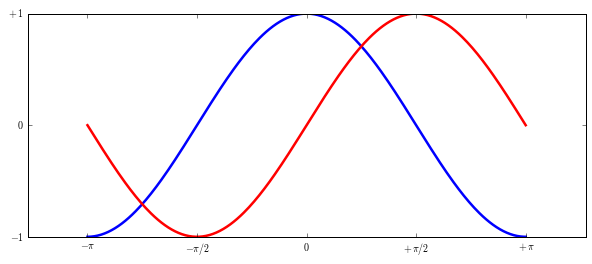

In [9]:
plt.figure(figsize=(10, 4), dpi=80)
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-")
plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])
plt.show()

**Taking Care of Details:**

* **Spines** are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions. We’ll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we’ll discard the top and right by setting their color to none and we’ll move the bottom and left ones to coordinate 0 in data space coordinates.
* **Legend:** let’s add a legend in the upper left corner. This only requires adding the keyword argument label (that will be used in the legend box) to the plot commands.
* **Annotations:** let’s annotate some interesting points using the annotate command. We chose the 2π/3 value and we want to annotate both the sine and the cosine. We’ll first draw a marker on the curve as well as a straight dotted line. Then, we’ll use the annotate command to display some text with an arrow.
* **Tick Labels:** the tick labels are now hardly visible because of the blue and red lines. We can make them bigger and we can also adjust their properties such that they’ll be rendered on a semi-transparent white background. This will allow us to see both the data and the labels.

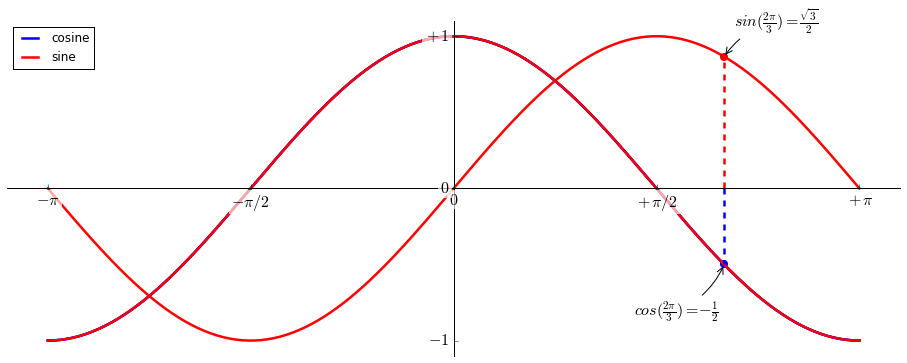

In [10]:
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-")
plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])
# Spines:
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
# Legend:
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(x, c, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='upper left')
# Annotations:
t = 2*np.pi/3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')
plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
# Tick Labels:
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

## 2 Subplots

With subplot you can arrange plots in a regular grid. You need to specify the number of rows and columns and the number of the plot. Note that the gridspec command is a more powerful alternative.

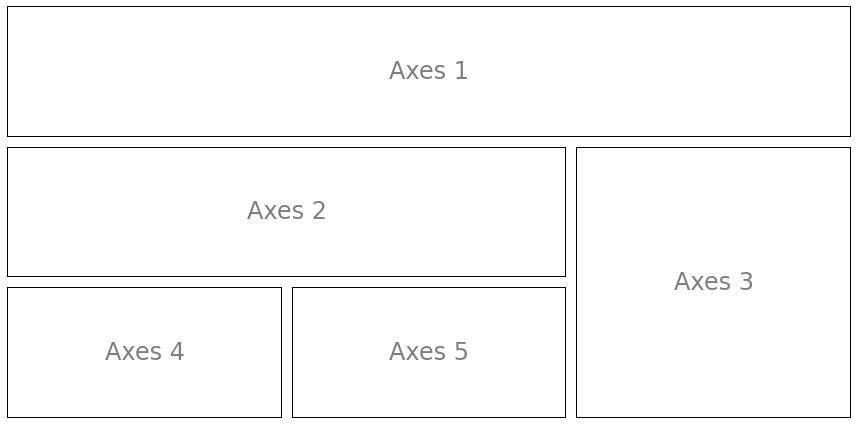

In [11]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12, 6))
G = gridspec.GridSpec(3, 3)

axes_1 = plt.subplot(G[0, :])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 1', ha='center', va='center', size=24, alpha=.5)

axes_2 = plt.subplot(G[1, :-1])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 2', ha='center', va='center', size=24, alpha=.5)

axes_3 = plt.subplot(G[1:, -1])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 3', ha='center', va='center', size=24, alpha=.5)

axes_4 = plt.subplot(G[-1, 0])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 4', ha='center', va='center', size=24, alpha=.5)

axes_5 = plt.subplot(G[-1, -2])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 5', ha='center', va='center', size=24, alpha=.5)

plt.tight_layout()
plt.show()

## 3 Axes

Axes are very similar to subplots but allow placement of plots at any location in the figure. So if we want to put a smaller plot inside a bigger one we do so with axes.

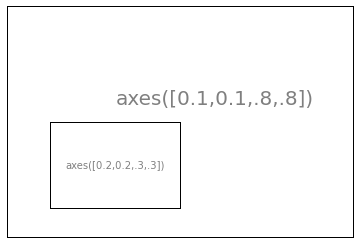

In [12]:
plt.axes([.1, .1, .8, .8])
plt.xticks(())
plt.yticks(())
plt.text(.6, .6, 'axes([0.1,0.1,.8,.8])', ha='center', va='center',
         size=20, alpha=.5)

plt.axes([.2, .2, .3, .3])
plt.xticks(())
plt.yticks(())
plt.text(.5, .5, 'axes([0.2,0.2,.3,.3])', ha='center', va='center',
        size=10, alpha=.5)

plt.show()

## 4 Example: Cycle Trough many colors

In [13]:
np.linspace(0,1,20)

array([ 0.        ,  0.05263158,  0.10526316,  0.15789474,  0.21052632,
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ])

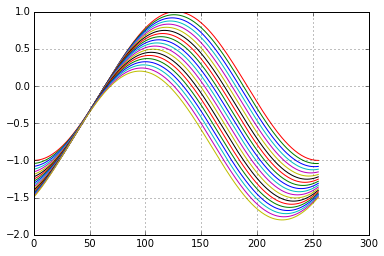

In [14]:
from itertools import cycle

colors = cycle('rgbcmyk')
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
for i, c in zip(np.linspace(0,0.8,20), colors):
    plt.plot(np.cos(x+i)-i, c)

plt.grid()
plt.show()

## 5 Example: Filled Plots

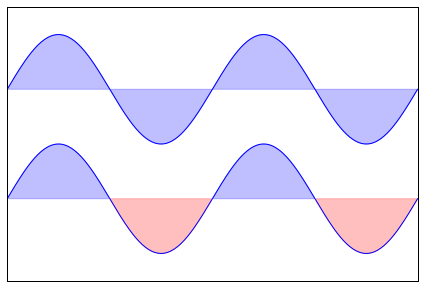

In [15]:
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2 * X)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y + 1, color='blue', alpha=.25)

plt.plot(X, Y - 1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y - 1, (Y - 1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y - 1, (Y - 1) < -1, color='red',  alpha=.25)

plt.xlim(-np.pi, np.pi)
plt.xticks(())
plt.ylim(-2.5, 2.5)
plt.yticks(())

plt.show()

## 6 Example: Custom Scatter Plot

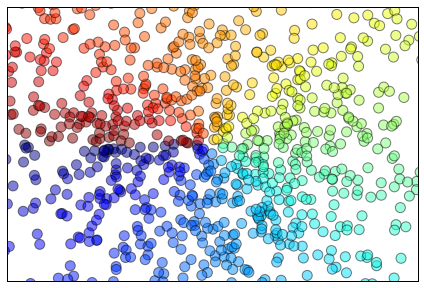

In [16]:
n = 1000
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=100, c=T, alpha=.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())
plt.ylim(-1.5, 1.5)
plt.yticks(())

plt.show()

## 7 Example: Custom Histogram

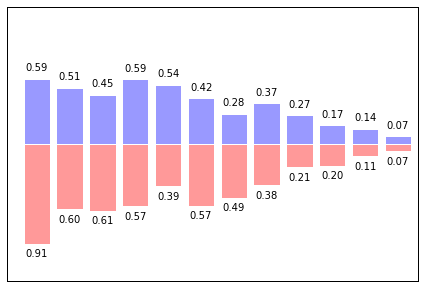

In [17]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '{:.2f}'.format(y), ha='center', va= 'bottom')

for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y - 0.05, '{:.2f}'.format(y), ha='center', va= 'top')

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

## 8 Example: Simple 3D Plot - Surface

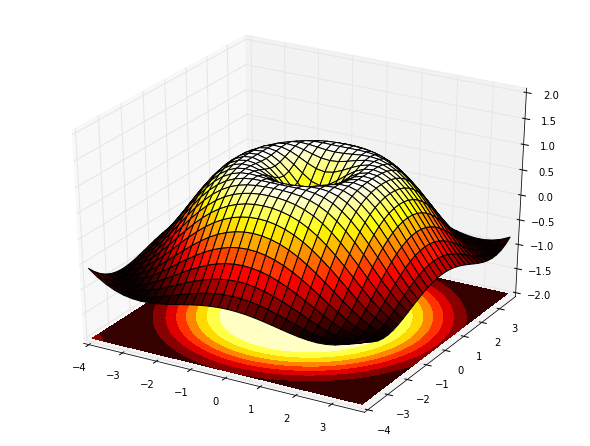

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()

## 9 Example: Colormaps

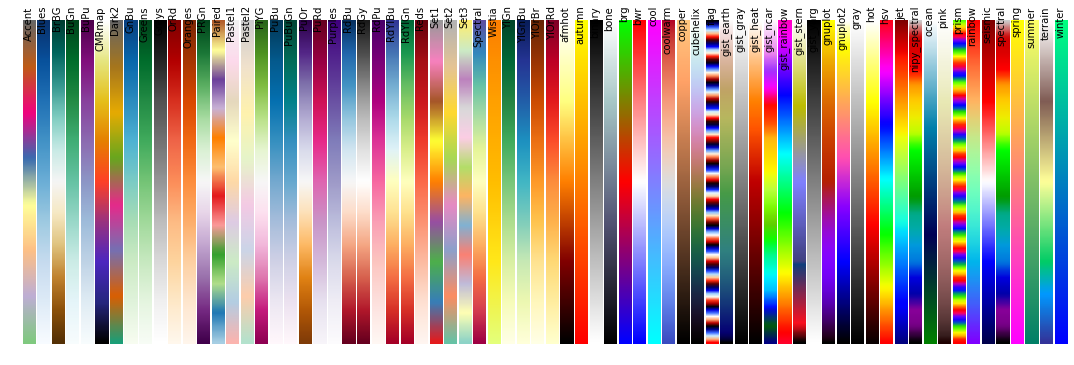

In [19]:
plt.rc('text', usetex=False)
a = np.outer(np.arange(0,1,0.01), np.ones(10))
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps = [m for m in plt.cm.datad if not m.endswith("_r")]
maps.sort()
lenght = len(maps)+1
for i, m in enumerate(maps):
    plt.subplot(1,lenght,i+1)
    plt.axis("off")
    plt.imshow(a, aspect='auto', cmap=plt.get_cmap(m), origin="lower")
    plt.title(m,rotation=90,fontsize=10)

## 10 Example: Skew and Kurtosis

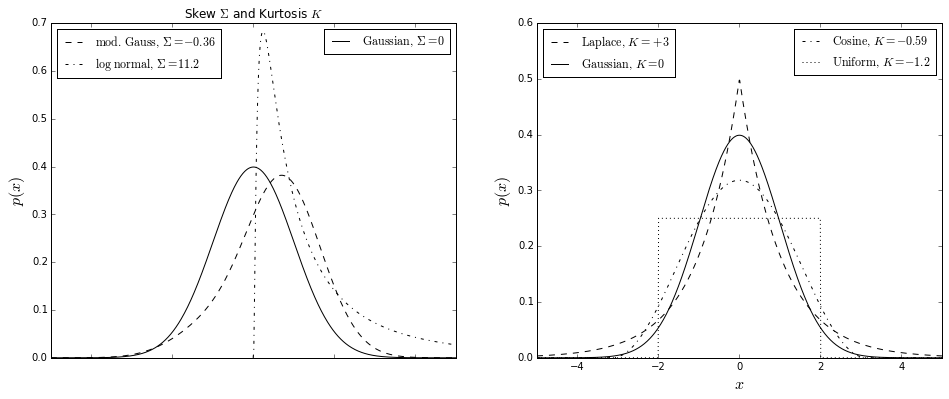

In [20]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 6))
fig.subplots_adjust(right=0.95, hspace=0.05)

# First show distributions with different skeq
ax = fig.add_subplot(121)
x = np.linspace(-8, 8, 1000)
N = stats.norm(0, 1)

l1, = ax.plot(x, N.pdf(x), '-k',
              label=r'${\rm Gaussian,}\ \Sigma=0$')

l2, = ax.plot(x, 0.5 * N.pdf(x) * (2 + x + 0.5 * (x * x - 1)),
              '--k', label=r'${\rm mod.\ Gauss,}\ \Sigma=-0.36$')
l3, = ax.plot(x[499:], stats.lognorm(1.2).pdf(x[499:]), '-.k',
              label=r'$\rm log\ normal,\ \Sigma=11.2$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.7001)
ax.set_ylabel('$p(x)$', fontsize=16)
ax.xaxis.set_major_formatter(plt.NullFormatter())

# trick to show multiple legends
leg1 = ax.legend([l1], [l1.get_label()], loc=1)
leg2 = ax.legend([l2, l3], (l2.get_label(), l3.get_label()), loc=2)
ax.add_artist(leg1)
ax.set_title('Skew $\Sigma$ and Kurtosis $K$')

# next show distributions with different kurtosis
ax = fig.add_subplot(122)
x = np.linspace(-5, 5, 1000)
l1, = ax.plot(x, stats.laplace(0, 1).pdf(x), '--k',
              label=r'${\rm Laplace,}\ K=+3$')
l2, = ax.plot(x, stats.norm(0, 1).pdf(x), '-k',
              label=r'${\rm Gaussian,}\ K=0$')
l3, = ax.plot(x, stats.cosine(0, 1).pdf(x), '-.k',
              label=r'${\rm Cosine,}\ K=-0.59$')
l4, = ax.plot(x, stats.uniform(-2, 4).pdf(x), ':k',
              label=r'${\rm Uniform,}\ K=-1.2$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.6001)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$p(x)$', fontsize=16)

# trick to show multiple legends
leg1 = ax.legend((l1, l2), (l1.get_label(), l2.get_label()), loc=2)
leg2 = ax.legend((l3, l4), (l3.get_label(), l4.get_label()), loc=1)
ax.add_artist(leg1)

plt.show()

---

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.